# NLP on Legal_text_classification

## Import the required packages

In [8]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

## Import the data

In [81]:
Data=pd.read_csv("legal_text_classification.csv",sep = ',')
Data.head(5)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [82]:
Dlen=[]
for text in Data.case_text:
  try:
    Dlen.append(len(text))
  except:
    Dlen.append(0)

Data["len_text"]=pd.Series(Dlen)
Data.head(10)

,case_id,case_outcome,case_title,case_text,len_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701
5,Case6,cited,GEC Marconi Systems Pty Ltd v BHP Information ...,I accept that the making of a rolled up offer ...,1384
6,Case7,cited,John S Hayes &amp; Associates Pty Ltd v Kimber...,The preceding general principles inform the ex...,701
7,Case8,cited,Seven Network Limited v News Limited (2007) 24...,On the question of the level of unreasonablene...,3097
8,Case9,applied,Australian Broadcasting Corporation v O'Neill ...,recent decision of the High Court in Australia...,741
9,Case10,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...,Hexal Australia Pty Ltd v Roche Therapeutics I...,1368


In [83]:
Data.isnull().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
len_text          0
dtype: int64

In [84]:
Data=Data.dropna()
case_types=list(Data.case_outcome.unique())
print(case_types)
Data.case_outcome.value_counts()

['cited', 'applied', 'followed', 'referred to', 'related', 'considered', 'discussed', 'distinguished', 'affirmed', 'approved']


cited            12110
referred to       4363
applied           2438
followed          2252
considered        1699
discussed         1018
distinguished      603
related            112
approved           108
affirmed           106
Name: case_outcome, dtype: int64

## Balance the Data

In [85]:
Sep_Data={}
for ct in case_types:
  Sep_Data[ct]=Data[Data["case_outcome"]==ct]
  print(ct, len(Sep_Data[ct]))
  

cited 12110
applied 2438
followed 2252
referred to 4363
related 112
considered 1699
discussed 1018
distinguished 603
affirmed 106
approved 108


In [64]:
for ct in case_types:
  Sep_Data[ct]=Sep_Data[ct].sample(106)
  print(ct, len(Sep_Data[ct]))

cited 106
applied 106
followed 106
referred to 106
related 106
considered 106
discussed 106
distinguished 106
affirmed 106
approved 106


In [86]:
Flag=True
for ct in case_types:
  if Flag==True:
    Data=Sep_Data[ct]
    Flag=False
  else:
    Data=Data.append(Sep_Data[ct])
print(len(Data))
Data.head(5)

24809


,case_id,case_outcome,case_title,case_text,len_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701


## Exploratory Data Analysis

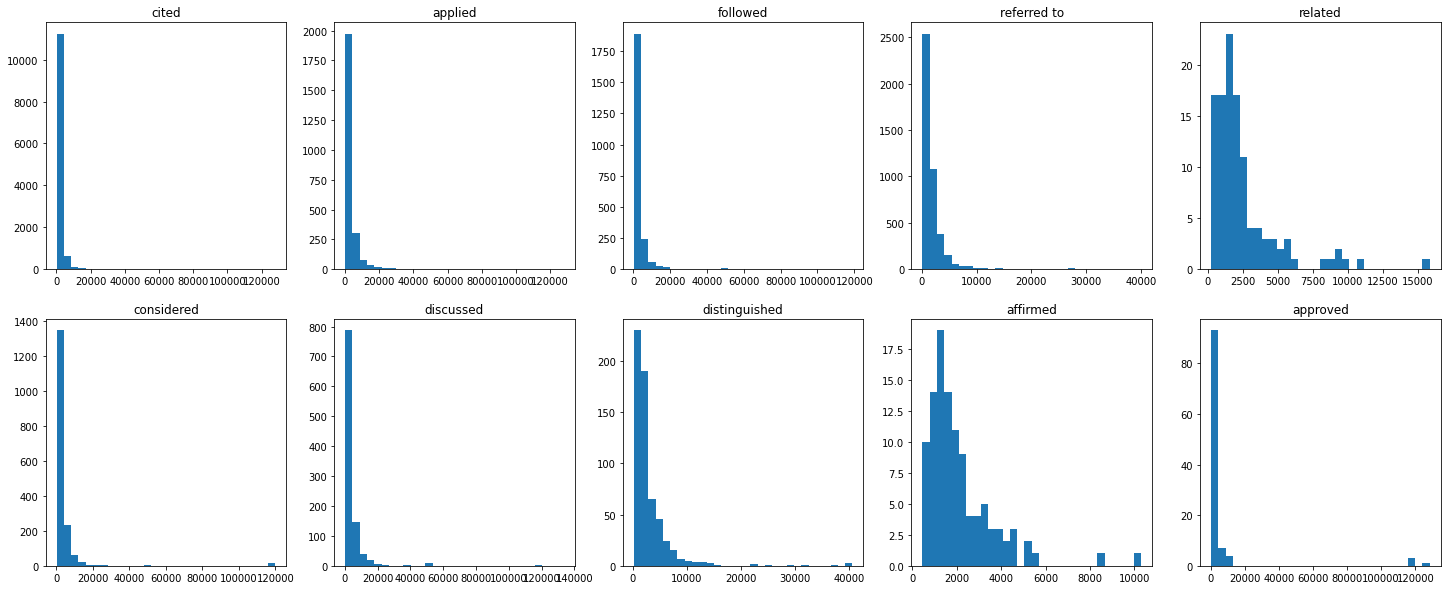

In [87]:
count=1
plt.figure(figsize=(25,10))
for i in range(len(Sep_Data)):
  plt.subplot(2,5,count)
  plt.title(case_types[i])
  plt.hist(Sep_Data[case_types[i]]["len_text"],bins=30)
  count=count+1

## Data Preperation

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
X_train,X_test,y_train,y_test=train_test_split(Data["case_text"],Data["case_outcome"],test_size=0.3,shuffle=True,stratify=Data["case_outcome"])

In [69]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)

### Pipeline and RF

In [93]:
#clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=200))])
clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',SVC(C=1000))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1000))])

In [91]:
y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[   0,    0,    0,   32,    0,    0,    0,    0,    0,    0],
       [   0,  110,    0,  578,    7,    1,    1,   12,   22,    0],
       [   0,    0,    3,   27,    2,    0,    0,    0,    0,    0],
       [   0,   49,    1, 3457,   26,   12,    4,   34,   50,    0],
       [   0,   10,    0,  407,   58,    1,    1,   18,   15,    0],
       [   0,    8,    0,  256,    5,   20,    0,    5,   11,    0],
       [   0,    3,    0,  142,    0,    0,   31,    1,    4,    0],
       [   0,   16,    0,  477,   14,    3,    0,  154,   12,    0],
       [   0,   11,    0,  857,    8,    8,    2,   10,  413,    0],
       [   0,    0,    0,   26,    0,    0,    0,    0,    1,    7]])

In [92]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     affirmed       0.00      0.00      0.00        32
      applied       0.53      0.15      0.23       731
     approved       0.75      0.09      0.17        32
        cited       0.55      0.95      0.70      3633
   considered       0.48      0.11      0.18       510
    discussed       0.44      0.07      0.11       305
distinguished       0.79      0.17      0.28       181
     followed       0.66      0.23      0.34       676
  referred to       0.78      0.32      0.45      1309
      related       1.00      0.21      0.34        34

     accuracy                           0.57      7443
    macro avg       0.60      0.23      0.28      7443
 weighted avg       0.60      0.57      0.50      7443



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NLP on Amazon Reviews

## Import Packages

In [155]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

## Import Data

In [156]:
Data=pd.read_excel("Reviews.xlsx")
Data.head(5)

,Label,Text,Unnamed: 2,Unnamed: 3
0,neutral,"According to Gran , the company has no plans t...",NaN,NaN
1,neutral,Technopolis plans to develop in stages an area...,NaN,NaN
2,negative,The international electronic industry company ...,NaN,NaN
3,positive,With the new production plant the company woul...,NaN,NaN
4,positive,According to the company 's updated strategy f...,NaN,NaN


In [157]:
Data=Data.drop(columns=["Unnamed: 2","Unnamed: 3"])
Dlen=[]
for text in Data.Text:
  try:
    Dlen.append(len(text))
  except:
    Dlen.append(0)

Data["len_text"]=pd.Series(Dlen)
Data.head(10)

,Label,Text,len_text
0,neutral,"According to Gran , the company has no plans t...",127
1,neutral,Technopolis plans to develop in stages an area...,190
2,negative,The international electronic industry company ...,228
3,positive,With the new production plant the company woul...,206
4,positive,According to the company 's updated strategy f...,203
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178
6,positive,"For the last quarter of 2010 , Componenta 's n...",193
7,positive,"In the third quarter of 2010 , net sales incre...",125
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...,122
9,positive,"Operating profit totalled EUR 21.1 mn , up fro...",103


In [158]:
Data.isnull().sum()

Label       0
Text        0
len_text    0
dtype: int64

In [159]:
Data=Data.dropna()
case_types=list(Data.Label.unique())
print(case_types)
Data.Label.value_counts()

['neutral', 'negative', 'positive']


neutral     2879
positive    1363
negative     604
Name: Label, dtype: int64

## Balance Data

In [160]:
Sep_Data={}
for ct in case_types:
  Sep_Data[ct]=Data[Data["Label"]==ct]
  print(ct, len(Sep_Data[ct]))

neutral 2879
negative 604
positive 1363


In [161]:
for ct in case_types:
  Sep_Data[ct]=Sep_Data[ct].sample(604)
  print(ct, len(Sep_Data[ct]))

neutral 604
negative 604
positive 604


In [162]:
Flag=True
for ct in case_types:
  if Flag==True:
    Data=Sep_Data[ct]
    Flag=False
  else:
    Data=Data.append(Sep_Data[ct])
print(len(Data))
Data.head(5)

1812


,Label,Text,len_text
2443,neutral,Electronic versions require 24-48 hours as eac...,126
3271,neutral,The Insolvency Act regulates the amount of deb...,91
1984,neutral,"The five-storey , eco-efficient building will ...",125
3344,neutral,The repo rate will gradually reach 2 % at the ...,101
1834,neutral,Active shipping is essential for Finland .,42


## EDA

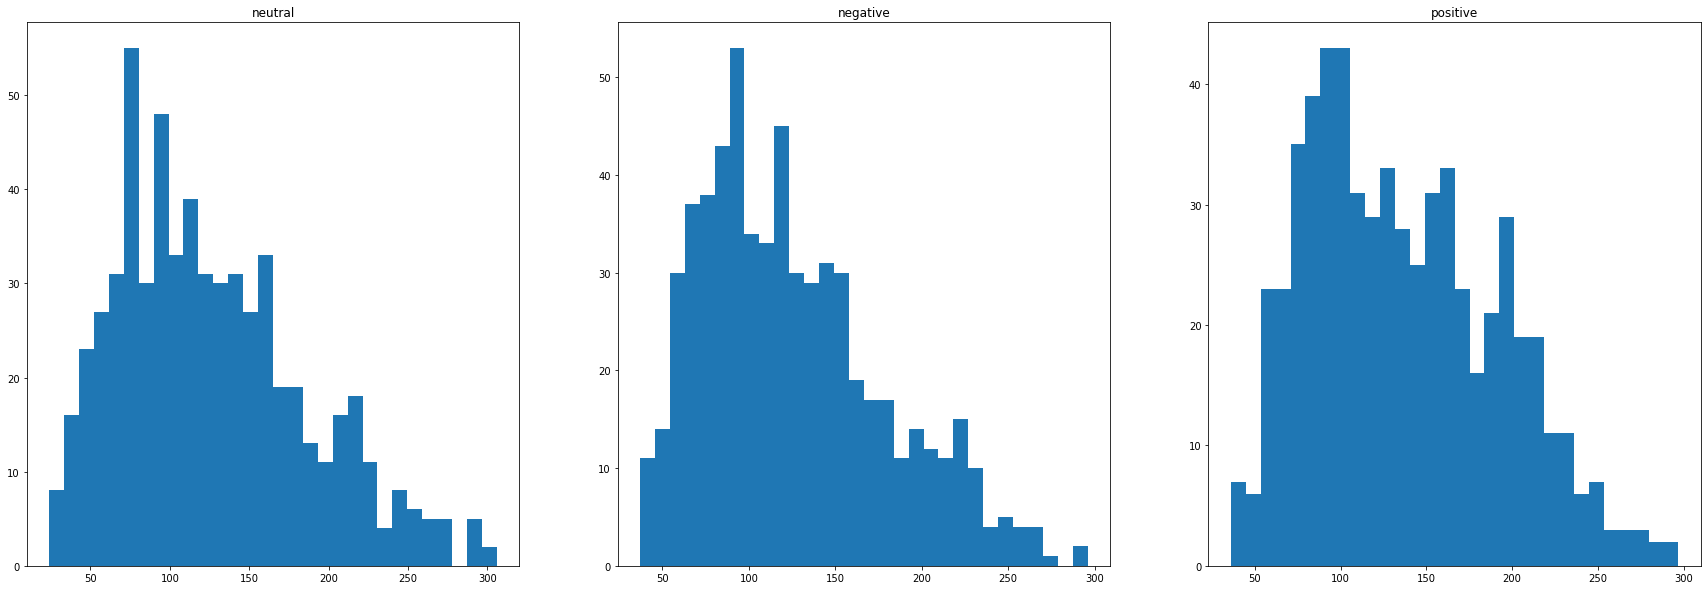

In [163]:
count=1
plt.figure(figsize=(30,10))
for i in range(len(Sep_Data)):
  plt.subplot(1,3,count)
  plt.title(case_types[i])
  plt.hist(Sep_Data[case_types[i]]["len_text"],bins=30)
  count=count+1

## Data Preperation

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [195]:
X_train,X_test,y_train,y_test=train_test_split(Data["Text"],Data["Label"],test_size=0.3,shuffle=True,stratify=Data["Label"])

## Model Training and Testing

Random Forest Classifier

In [196]:
clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=100))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("--------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[125  37  19]
 [ 15 144  22]
 [ 27  76  79]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72       181
     neutral       0.56      0.80      0.66       181
    positive       0.66      0.43      0.52       182

    accuracy                           0.64       544
   macro avg       0.66      0.64      0.63       544
weighted avg       0.66      0.64      0.63       544



Gradient Boosting Method

In [197]:
clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',GradientBoostingClassifier(n_estimators=100))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("--------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[130  34  17]
 [ 10 141  30]
 [ 17  54 111]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77       181
     neutral       0.62      0.78      0.69       181
    positive       0.70      0.61      0.65       182

    accuracy                           0.70       544
   macro avg       0.72      0.70      0.70       544
weighted avg       0.72      0.70      0.70       544



SVC Method

In [198]:
clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',SVC(C=10))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("--------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[132  28  21]
 [ 18 134  29]
 [ 20  49 113]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75       181
     neutral       0.64      0.74      0.68       181
    positive       0.69      0.62      0.66       182

    accuracy                           0.70       544
   macro avg       0.70      0.70      0.70       544
weighted avg       0.70      0.70      0.70       544



Neural Network

In [199]:
clf=Pipeline([('tfidf',TfidfVectorizer()), ('clf',MLPClassifier(random_state=1, max_iter=300))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("--------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))


Confusion Matrix
[[130  28  23]
 [ 31 107  43]
 [ 31  41 110]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    negative       0.68      0.72      0.70       181
     neutral       0.61      0.59      0.60       181
    positive       0.62      0.60      0.61       182

    accuracy                           0.64       544
   macro avg       0.64      0.64      0.64       544
weighted avg       0.64      0.64      0.64       544

